In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import sys
sys.path.insert(0, '/Users/chris/GradResearch/SDSS_S82_FP_research/packages/')
import variabilityFunctions as varF
import os 
import datetime


In [6]:
outDir = os.path.join(os.getcwd()[:-4],'data_products/'+'Fig_periodogram/', 
                      datetime.datetime.now().strftime('%Y-%m-%d')+ '/')
if not os.path.exists(outDir): os.system('mkdir %s' % outDir)
    
print('Today we save all figure data in: %s '%outDir)

Today we save all figure data in: /Users/chris/GradResearch/SDSS_S82_FP_research/data_products/Fig_periodogram/2017-04-17/ 


Update 2017-04-17 : We run this experiment in tandem with Variability_p_sigma_meaning . 
    The point is to simulate a time series, reproduce various periodogram-related figures from the AstroML textbook. 
    

## Lomb-Scargle Periodogram : Fig. 10.14, 10.15 

In [7]:
# Load the time series realizations from above 
A_values = [0.01, 0.1, 0.7,1.0]

#for A in A_values:
A = A_values[3]
for k in range(N_iterations):
    fname = '../data_products/time_series_sig_1.0_A_'+str(A).ljust(4,'0')+\
                    '_iteration_'+str(k).rjust(3,'0')+'.txt'
    data = np.genfromtxt(fname)
    xi = data[:,0]
    ei = data[:,1]



NameError: name 'N_iterations' is not defined

In [113]:
omega = np.linspace(0, 5, 1001)[1:]
import scipy.signal as signal

P_obs = signal.lombscargle(xi,ei,omega)

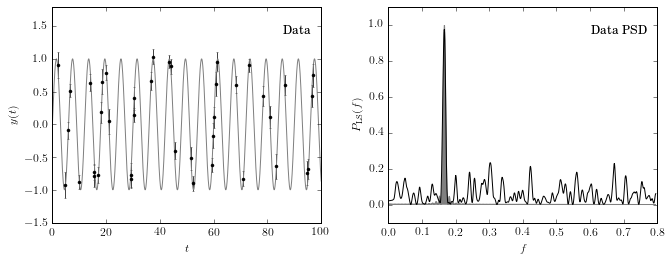

In [128]:
# Calculate 10.14 
from astroML.time_series import lomb_scargle
# Generate the data
np.random.seed(42)
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)

y_window = np.ones_like(y_obs1)

t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)


from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

import scipy.signal as signal



#------------------------------------------------------------
# Compute the periodogram
omega = np.linspace(0, 5, 1001)[1:]
P_obs1 = lomb_scargle(t_obs, y_obs1, dy1, omega)
P_obs2 = lomb_scargle(t_obs, y_obs2, dy2, omega)
P_window = lomb_scargle(t_obs, y_window, 1, omega,
                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

omega /= 2 * np.pi

#------------------------------------------------------------
# Prepare the figures
fig, ax = plt.subplots(1,2,figsize=(10, 4))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax[0].plot(t, y, '-', c='gray')
ax[0].errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
ax[0].set_ylim(-1.5, 1.8)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$y(t)$')


ax[1].fill(omega, P_true, fc='gray', ec='gray')
ax[1].plot(omega, P_obs1, '-', c='black')
ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

plt.show()

## Test : how the periodogram detects sinusoids generated on-the-fly  

The input frequency is f_true = 1
Using 242.50000000000003 bins
Best period: 0.2946293723183734 days


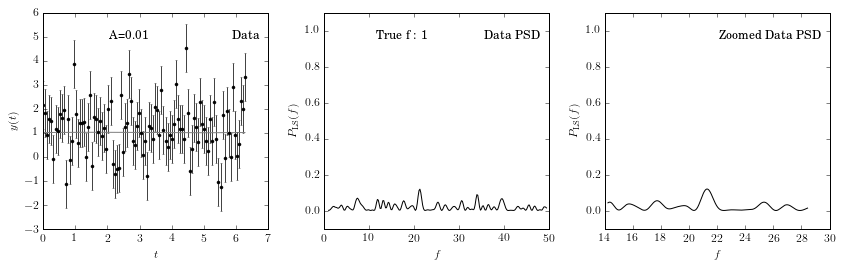

Using 242.50000000000003 bins
Best period: 0.1951727342953251 days


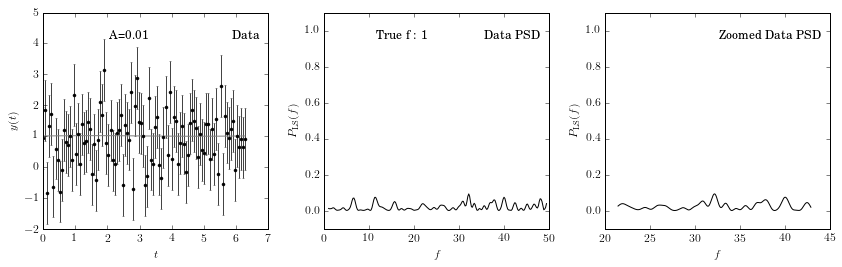

Using 242.50000000000003 bins
Best period: 0.1951727342953251 days


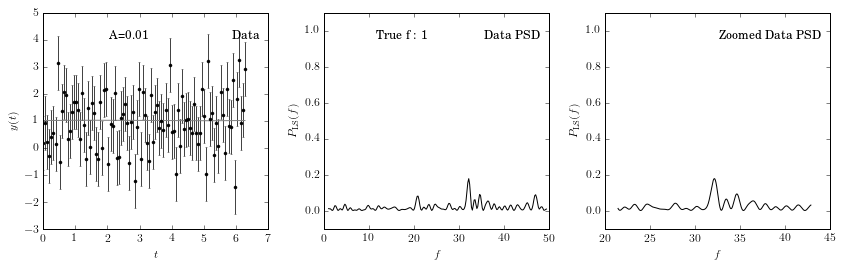

Using 242.50000000000003 bins
Best period: 0.2095844510768554 days


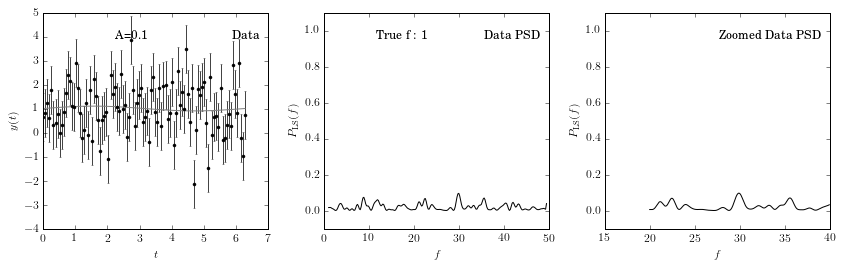

Using 242.50000000000003 bins
Best period: 0.31868834242455646 days


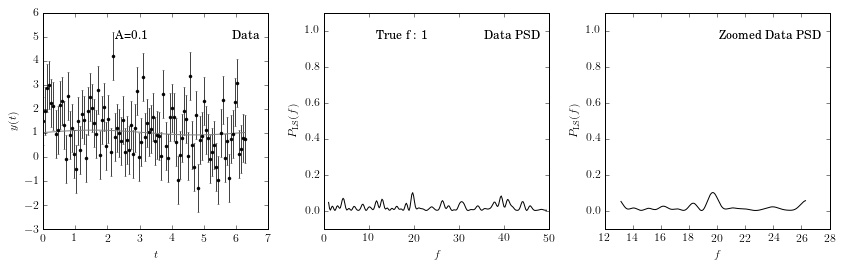

Using 242.50000000000003 bins
Best period: 0.13878174860510312 days


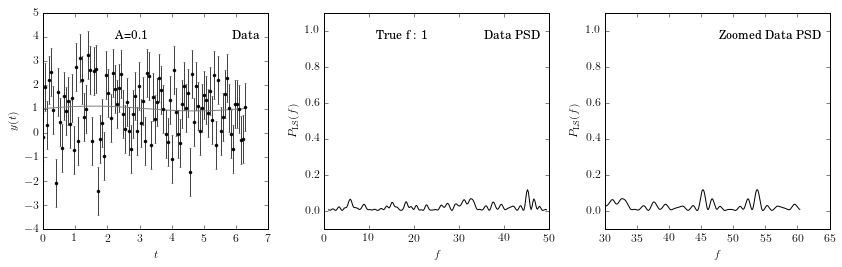

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


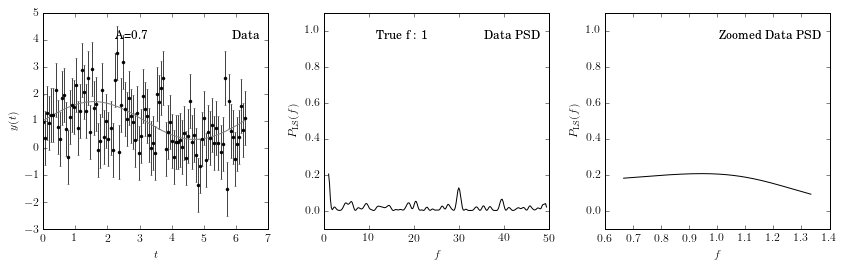

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


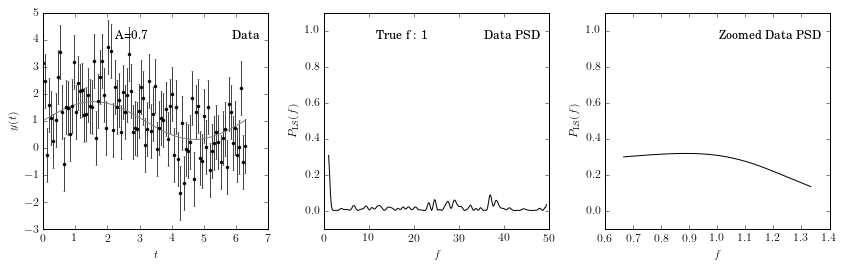

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


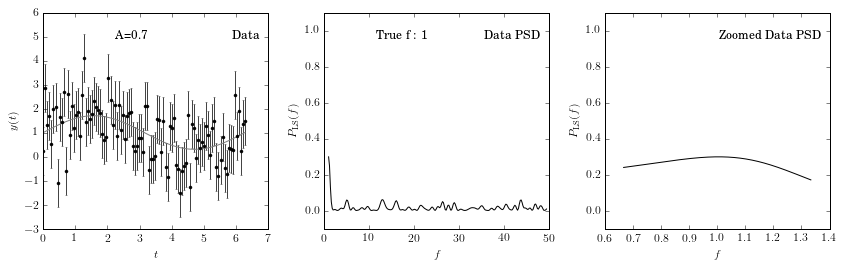

Using 242.50000000000003 bins
Best period: 5.230561861935338 days


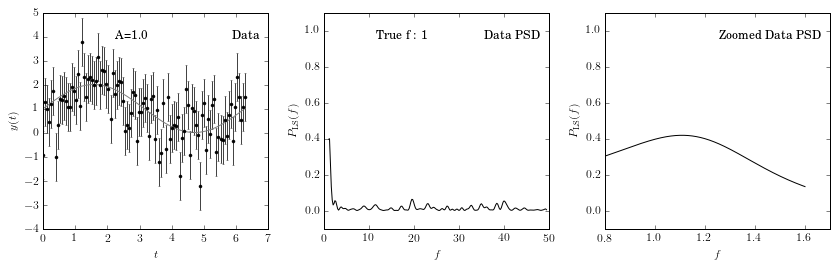

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


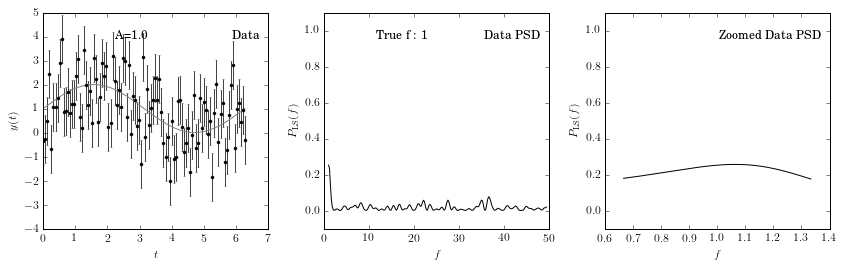

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


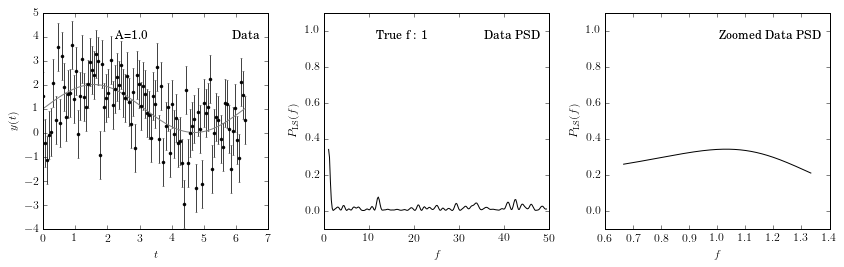

In [206]:
# Calculate 10.14 
from astroML.time_series import lomb_scargle
# Generate the data
np.random.seed(42)
    
N_periods = 1
f_true = 1 
print('The input frequency is f_true = %d'%f_true)
v)
#sigma_0 = 1.0
i = 0
for A in [0.01, 0.1, 0.7,1.0] : 
    for k in range(N_iterations):
        fname = '../data_products/time_series_sig_1.0_A_'+str(A).ljust(4,'0')+\
                        '_iteration_'+str(k).rjust(3,'0')+'.txt'
        data = np.genfromtxt(fname)
        xi = data[:,0]
        ei = data[:,1]
        #ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t_obs)) 
        #y_obs1 = A* np.sin(t_obs) + 1 + ei
        y_obs1 = xi 
        # true underlying time series 
        t = np.linspace(0,  N_periods*omega_true, 10000)
        y = A* np.sin(t) + 1

        #------------------------------------------------------------
        # Compute the periodogram
        def frequency_grid(times):

            freq_min =  2* np.pi / abs(min(times) - max(times))
            delta_t  = np.zeros(len(times)-1) 
            for i in range(len(times)-1):
                delta_t[i] = (times[i+1]-times[i])
            freq_max = freq_max = np.pi /  np.median(delta_t)  # COMPLETE

            omega_min = 2*np.pi * freq_min

            n_bins =   5 * 2*np.pi*(freq_max - freq_min) /omega_min  # COMPLETE
            print('Using {} bins'.format(n_bins))
            return np.linspace(freq_min, freq_max, n_bins)

        omega = frequency_grid(t_obs)

        P_obs1 = lomb_scargle(t_obs, y_obs1, sigma_0*np.ones_like(y_obs1), omega)
        #P_true = lomb_scargle(t, y,  omega)

        def LS_peak_to_period(omegas, P_LS):
            """find the highest peak in the LS periodogram and return the corresponding period."""
            max_freq = omegas[np.argmax(P_LS)]
            return 2*np.pi/max_freq

        # provided alternate frequency function
        def alt_frequency_grid(Pmin, Pmax, n_bins = 5000):
            """Generate an angular frequency grid between Pmin and Pmax (assumed to be in days)"""
            freq_max = 2*np.pi / Pmin
            freq_min = 2*np.pi / Pmax
            return np.linspace(freq_min, freq_max, n_bins)

        best_period = LS_peak_to_period(omega, P_obs1)
        print("Best period: {} days".format(best_period))

        # Zoom in on the peak... , find new omegas and powers 
        zoomed_omega = alt_frequency_grid(Pmin=0.75*best_period, Pmax=1.5*best_period, n_bins = 5000) #
        P_obs2 = lomb_scargle(t_obs, y_obs1, sigma_0*np.ones_like(y_obs1), zoomed_omega)

        #------------------------------------------------------------
        # Prepare the figures
        from astroML.plotting import setup_text_plots
        setup_text_plots(fontsize=12, usetex=True)

        fig, ax = plt.subplots(1,3,figsize=(13, 4))
        fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                            left=0.11, right=0.95)

        ax[0].plot(t, y, '-', c='gray')
        ax[0].errorbar(t_obs, y_obs1, sigma_0, fmt='.k', capsize=1, ecolor='#444444')
        ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
        ax[0].text(0.46, 0.92, "A="+str(A), ha='right', va='top', transform=ax[0].transAxes)
        #ax[0].set_ylim(-1.5, 1.8)
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$y(t)$')

        #
        #ax[1].fill(omega, P_true, fc='gray', ec='gray')
        ax[1].plot(omega, P_obs1, '-', c='black')

        ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
        ax[1].text(0.46, 0.92, "True f : "+str(f_true), ha='right', va='top', transform=ax[1].transAxes)
        ax[1].set_ylim(-0.1, 1.1)
        ax[1].set_xlabel('$f$')
        ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

        ax[2].plot(zoomed_omega, P_obs2, '-', c='black')
        ax[2].text(0.96, 0.92, "Zoomed Data PSD", ha='right', va='top', transform=ax[2].transAxes)
        ax[2].set_ylim(-0.1, 1.1)
        ax[2].set_xlabel('$f$')
        ax[2].set_ylabel(r'$P_{\rm LS}(f)$')

        plt.savefig('../data_products/Sine_'+str(i).rjust(2,'0')+'_PSD_sig_1.0_xi_ei_A_'+str(A)+'_iter_'+str(k).rjust(3,'0')+'N_periods_'+str(N_periods)+'.png')
        plt.show()
        i +=1


Using 242.50000000000003 bins


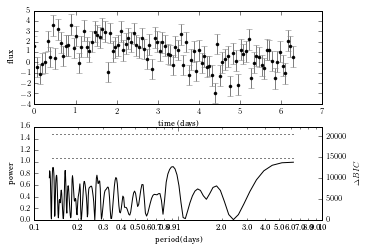

In [158]:
## Figure 10.15 

import numpy as np
from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate Data
np.random.seed(0)
N = 100
P =  2*np.pi

t = np.linspace(0,2*np.pi, num=100)
y_obs = xi
dy = ei


#------------------------------------------------------------
# Compute periodogram
def frequency_grid(times):
    
    freq_min =  2* np.pi / abs(min(times) - max(times))
    delta_t  = np.zeros(len(times)-1) 
    for i in range(len(times)-1):
        delta_t[i] = (times[i+1]-times[i])
    freq_max = freq_max = np.pi /  np.median(delta_t)  # COMPLETE
    
    omega_min = 2*np.pi * freq_min
    
    n_bins =   5 * 2*np.pi*(freq_max - freq_min) /omega_min  # COMPLETE
    print('Using {} bins'.format(n_bins))
    return np.linspace(freq_min, freq_max, n_bins)

omega = frequency_grid(t)
period = 2 * np.pi / omega
PS = lomb_scargle(t, y_obs, dy, omega, generalized=True)

#------------------------------------------------------------
# Get significance via bootstrap
D = lomb_scargle_bootstrap(t, y_obs, dy, omega, generalized=True,
                           N_bootstraps=1000, random_state=0)
sig1, sig5 = np.percentile(D, [99, 95])

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(left=0.1, right=0.9, hspace=0.25)

# First panel: the data
ax = fig.add_subplot(211)
ax.errorbar(t, y_obs,sigma_0, fmt='.k', lw=1, ecolor='gray')
ax.set_xlabel('time (days)')
ax.set_ylabel('flux')
#ax.set_xlim(-5, 105)

# Second panel: the periodogram & significance levels
ax1 = fig.add_subplot(212, xscale='log')
ax1.plot(period, PS, '-', c='black', lw=1, zorder=1)
ax1.plot([period[0], period[-1]], [sig1, sig1], ':', c='black')
ax1.plot([period[0], period[-1]], [sig5, sig5], ':', c='black')

#ax1.annotate("", (0.3, 0.65), (0.3, 0.85), ha='center',
#             arrowprops=dict(arrowstyle='->'))

#ax1.set_xlim(period[0], period[-1])
#ax1.set_ylim(-0.05, 0.85)

ax1.set_xlabel(r'period (days)')
ax1.set_ylabel('power')

# Twin axis: label BIC on the right side
ax2 = ax1.twinx()
ax2.set_ylim(tuple(lomb_scargle_BIC(ax1.get_ylim(), y_obs, dy)))
ax2.set_ylabel(r'$\Delta BIC$')

ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_minor_formatter(plt.FormatStrFormatter('%.1f'))
ax1.xaxis.set_major_locator(plt.LogLocator(10))
ax1.xaxis.set_major_formatter(plt.FormatStrFormatter('%.3g'))

plt.show()

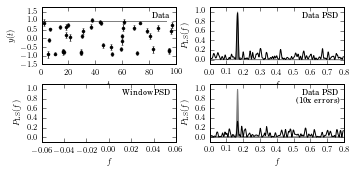

In [327]:

# Fig. 10.14 
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.time_series import lomb_scargle

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Generate the data
np.random.seed(42)
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)

y_window = np.ones_like(y_obs1)

t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)

#------------------------------------------------------------
# Compute the periodogram
omega = np.linspace(0, 5, 1001)[1:]
P_obs1 = lomb_scargle(t_obs, y_obs1, dy1, omega)
P_obs2 = lomb_scargle(t_obs, y_obs2, dy2, omega)
#P_window = lomb_scargle(t_obs, y_window, 1, omega,
#                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

t = 100 * np.random.random(40) 
y = np.ones_like(t) 
frequency, P_window = LombScargle(t, y).autopower() 


omega /= 2 * np.pi

#------------------------------------------------------------
# Prepare the figures
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax = fig.add_subplot(221)
ax.plot(t, y, '-', c='gray')
ax.errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax.text(0.96, 0.92, "Data", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-1.5, 1.8)
ax.set_xlabel('$t$')
ax.set_ylabel('$y(t)$')

ax = fig.add_subplot(223)
ax.plot(frequency, P_window, '-', c='black')
ax.text(0.96, 0.92, "Window PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

ax = fig.add_subplot(222)
ax.fill(omega, P_true, fc='gray', ec='gray')
ax.plot(omega, P_obs1, '-', c='black')
ax.text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

ax = fig.add_subplot(224)
ax.fill(omega, P_true, fc='gray', ec='gray')
ax.plot(omega, P_obs2, '-', c='black')
ax.text(0.96, 0.92, "Data PSD\n(10x errors)",
        ha='right', va='top', transform=ax.transAxes)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('$f$')
ax.set_ylabel(r'$P_{\rm LS}(f)$')

plt.show()

In [239]:
import numpy as np
import astroML
from astroML.time_series import lomb_scargle

t_obs = 100 * np.random.random(40) 
y_window = np.ones_like(t_obs)
#omega = np.linspace(0, 5, 1001)[1:] 

P_window = lomb_scargle(t_obs, y_window, 1, omega, generalized=False, subtract_mean=False)



In [226]:
from astropy.stats import LombScargle

t = 100 * np.random.random(40) 
y = np.ones_like(t_obs) 
omega = np.linspace(0, 5, 1001)[1:] 
frequency, power = P_window = LombScargle(t, y).autopower() # , fit_mean=False, center_data=False)





## Use Jake VdP suggestion to allow LS to set the frequency grid, to avoid missing out the sought after frequency...

--> his paper https://arxiv.org/pdf/1502.01344v1.pdf

--> AstroML Lomb_Scargle code : pointing to Astropy LombScargle https://github.com/astroML/astroML/blob/master/astroML/time_series/periodogram.py

--> Fig 10.15 : P_LS with BIC, AIC http://www.astroml.org/book_figures/chapter10/fig_LS_example.html 

--> Fig 10.14 : the effect of sampling http://www.astroml.org/book_figures/chapter10/fig_sampling.html 

--> Jake's blog post https://jakevdp.github.io/blog/2015/06/13/lomb-scargle-in-python/ 

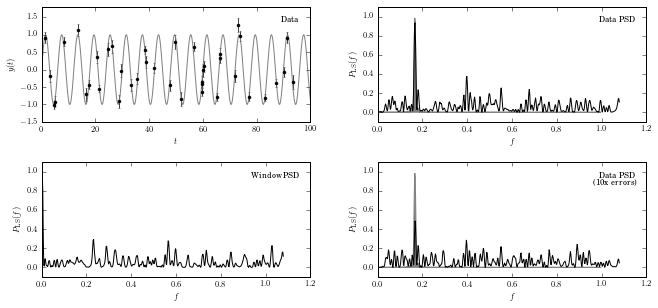

In [332]:
# Fig. 10.14 : comparing the hard-coded frequency grid vs autogrid 
# result : for the autogrid need to set minimum and maximum frequency, because otherwise 
# any period that would fit full number of times will work 
# (that's why here we get f=200 and f=100 if we don't set 
# minimum_frequency=0.01, maximum_frequency=1.0  ,
# while the true  frequency is 0.8 )

from astropy.stats import LombScargle

# sampling of the function + Gaussian noise 
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)


y_window = np.ones_like(y_obs1)

# underlying function 
t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)


#------------------------------------------------------------
# Compute the periodogram

set_frequencies = False  # choose whether we want autofrequencies,  or a hard-coded grid 
                        # NOTE all the dangers of over- or undersampling, as on Jake VdP blog ! 
    
if set_frequencies == True : 
    f_grid = np.linspace(0, 1, 1001)[1:] 
    P_obs1 = LombScargle(t_obs, y_obs1, dy1).power(f_grid)
    P_obs2 = LombScargle(t_obs, y_obs2, dy1).power(f_grid)
    P_window = LombScargle(t_obs, y_window, 1,fit_mean=False, center_data=False ).power(f_grid)
    P_true = LombScargle(t, y, 1).power(f_grid)
    
    f_obs1 = f_grid
    f_window = f_grid
    f_true = f_grid
    f_obs2 = f_grid 

else : 
    f_obs1, P_obs1 = LombScargle(t_obs, y_obs1, dy1).autopower()
    f_obs2, P_obs2 = LombScargle(t_obs, y_obs2, dy2).autopower()
    f_window, P_window = LombScargle(t_obs, y_window, 1,fit_mean=False, center_data=False ).autopower()
    f_true, P_true = LombScargle(t, y).autopower(minimum_frequency=0.01, maximum_frequency=1.0)  # why does it fail here with autopower ? 
    

#------------------------------------------------------------
# Prepare the figures
#fig, axs = plt.subplots(2,2,figsize=(10, 8))
#fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
#                    left=0.11, right=0.95)

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


fig, axs = plt.subplots(2,2,figsize=(10, 5))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)
ax = np.ravel(axs)

ax[0].plot(t, y, '-', c='gray')
ax[0].errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
ax[0].set_ylim(-1.5, 1.8)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$y(t)$')
ax[0].set_ylim(-1.5, 1.8)

ax[1].fill(f_true, P_true, fc='gray', ec='gray')
ax[1].plot(f_obs1, P_obs1, '-', c='black')
ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

ax[2].plot(f_window, P_window, '-', c='black')
ax[2].text(0.96, 0.92, "Window PSD", ha='right', va='top', transform=ax[2].transAxes)
ax[2].set_ylim(-0.1, 1.1)
ax[2].set_xlabel('$f$')
ax[2].set_ylabel(r'$P_{\rm LS}(f)$')
ax[2].set_ylim(-0.1, 1.1)

ax[3].fill(f_true, P_true, fc='gray', ec='gray')
ax[3].plot(f_obs2, P_obs2, '-', c='black')
ax[3].text(0.96, 0.92, "Data PSD\n(10x errors)", ha='right', va='top', transform=ax[3].transAxes)
ax[3].set_ylim(-0.1, 1.1)
ax[3].set_xlabel('$f$')
ax[3].set_ylabel(r'$P_{\rm LS}(f)$')



plt.show()

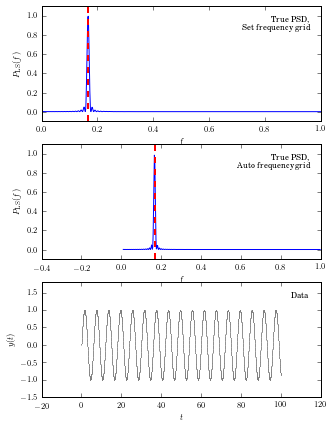

In [318]:
# Calculting autopower on a super-well 
# sampled example, so that there ought be no problems when it 
# comes to frequency detection...
# It shows that autopower needs 
# minimum_frequency=0.01, maximum_frequency=1.0  to be set, 
# or something else that is reasonable, otherwise 
# it will detect trash 

f0 = 1 / 6.0
t = np.linspace(0, 100, 10000)
y = np.sin(2.0 * np.pi *f0 *  t )

# set grid 
f_grid = np.linspace(0, 1, 1001)[1:] 
P_true_grid = LombScargle(t, y, 1).power(f_grid)


# auto grid 
#
# to compute frequencies, .autopower() calls .autofrequency(),  and it passes all arguments there 
# frequency = self.autofrequency(**kwargs) 
# so we can pass arguments such as 
# samples_per_peak=5, nyquist_factor=5, minimum_frequency=None, maximum_frequency=None
#
# http://jakevdp.github.io/astropy/api/astropy.stats.LombScargle.html

f_auto, P_true_auto = LombScargle(t, y,1 ).autopower(minimum_frequency=0.01, maximum_frequency=1.0)   
    
fig, ax= plt.subplots(3,1,figsize=(5,7))

ax[0].plot(f_grid, P_true_grid)
ax[0].text(0.96, 0.92, "True PSD, \nSet frequency grid", ha='right', va='top', transform=ax[0].transAxes)
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_xlabel('$f$')
ax[0].set_ylabel(r'$P_{\rm LS}(f)$')
ax[0].axvline(f0, ls='--', c='red', lw=2)

ax[1].plot(f_auto, P_true_auto)
ax[1].text(0.96, 0.92, "True PSD, \nAuto frequency grid", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlim(-0.4,)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')
ax[1].axvline(f0, ls='--', c='red', lw=2)
 
ax[2].scatter(t, y,  c='gray', lw=0, s=1, alpha=0.6)
ax[2].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[2].transAxes)
ax[2].set_ylim(-1.5, 1.8)
ax[2].set_xlabel('$t$')
ax[2].set_ylabel('$y(t)$')
ax[2].set_ylim(-1.5, 1.8)

plt.savefig('../data_products/problem-with_autopower.png')
    
    

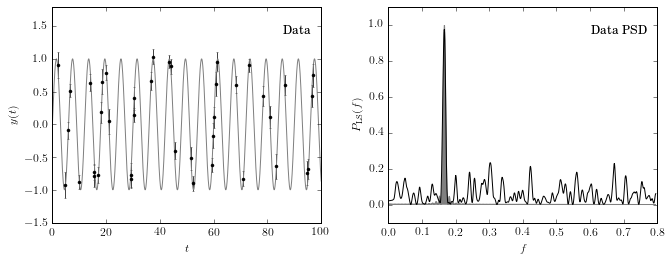

In [334]:
# Calculate 10.14 
# Take only the upper plots (w/o the 
# PSD of window function , or the 10 x error one )
from astroML.time_series import lomb_scargle
# Generate the data
np.random.seed(42)
t_obs = 100 * np.random.random(40)  # 40 observations in 100 days
y_obs1 = np.sin(np.pi * t_obs / 3)
dy1 = 0.1 + 0.1 * np.random.random(y_obs1.shape)
y_obs1 += np.random.normal(0, dy1)

y_obs2 = np.sin(np.pi * t_obs / 3)
dy2 = 10 * dy1
y_obs2 = y_obs2 + np.random.normal(dy2)

y_window = np.ones_like(y_obs1)

t = np.linspace(0, 100, 10000)
y = np.sin(np.pi * t / 3)


from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

import scipy.signal as signal



#------------------------------------------------------------
# Compute the periodogram
omega = np.linspace(0, 5, 1001)[1:]
P_obs1 = lomb_scargle(t_obs, y_obs1, dy1, omega)
P_obs2 = lomb_scargle(t_obs, y_obs2, dy2, omega)
P_window = lomb_scargle(t_obs, y_window, 1, omega,
                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

omega /= 2 * np.pi

#------------------------------------------------------------
# Prepare the figures
fig, ax = plt.subplots(1,2,figsize=(10, 4))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax[0].plot(t, y, '-', c='gray')
ax[0].errorbar(t_obs, y_obs1, dy1, fmt='.k', capsize=1, ecolor='#444444')
ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
ax[0].set_ylim(-1.5, 1.8)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$y(t)$')


ax[1].fill(omega, P_true, fc='gray', ec='gray')
ax[1].plot(omega, P_obs1, '-', c='black')
ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

plt.show()

## 10/24 Sinusoid generated as in 10.14, but homoscedastic errors, freq. grid from E.Bellm, overplot P_LS 10.49 

Eq. 10.49 : 
    
$P_{LS}(\omega) \approx 1 - \frac{\sigma^{2}}{V} - \frac{(\omega - \omega_{0})^{2}}{NV\sigma_{\omega}^{2}}$ where


$\sigma$ is the standard deviation of a Gaussian from which errors are generated, 

$\sigma_{\omega} = \omega_{1/2} [2N(V - \sigma^{2})]^{-1/2}$ is the uncertainty in the location of the peak (its width)

where $\omega_{1/2}$ is the FWHM of the peak, and for fixed length $T$ time series, $\omega_{1/2} \propto T$ (WHY?)

$V = \frac{1}{N} \sum_{j=1}^{N}{y_{j}^{2}}$

Using 154 bins
Gaussian :    amplitude, position, sigma
[ 0.10032543  0.14089544  0.08695147]


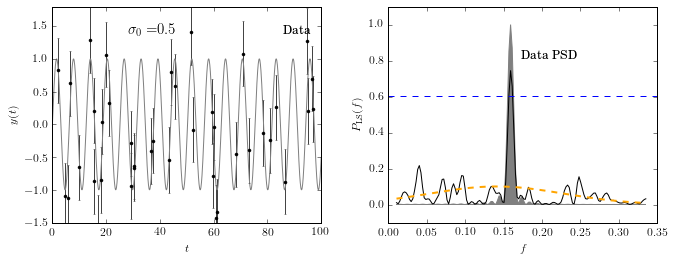

In [30]:
import matplotlib.pyplot as plt 

%matplotlib inline
# Calculate 10.14 
# Take only the upper plots
import numpy as np

from astroML.time_series import lomb_scargle
# Generate the data
np.random.seed(42)

f0 = 1 / (2 * np.pi) 
sigma_0 = 0.5
A = 1 
t_max = 100
homoscedastic = True
N = 40
sigma_guess = 0.5 # for the Gaussian fit, a guess of the extent of Gaussian... 

# Observed time series : with noise ...
# my version : homoscedastic noise ... 

if homoscedastic == True: 
    t_obs = t_max * np.random.random(N)
    ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t_obs))
    y_obs = A*np.sin(2.0 * np.pi *f0 *  t_obs )  + ei 
    dy = np.ones_like(t_obs) * sigma_0
    
    # True underlying time series... 
    t = np.linspace(0, t_max, 1000)
    ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t_obs))
    y = A*np.sin(2.0*np.pi * f0 * t )

# The 10.14 version : heteroscedastic noise... 
if homoscedastic == False : 
    t_obs = t_max * np.random.random(N)  # 40 observations in at **random** (to avoid aliasing frequencies...) 
                                        # times 100 days
    y_obs = A*np.sin(2.0*np.pi * f0 * t_obs )
    dy = 0.1 + 0.1 *np.random.random(y_obs.shape) # this makes heteroscedastic errors.... 
    y_obs += np.random.normal(0, dy)







from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=True)

#------------------------------------------------------------
# Compute the periodogram

# There are various ways of choosing the frequency grid - 
# I wrote a code that calculates that (based on Eric Bellm’s 
# notebook exercises from this summer), instead of using .autopower() 
# method (because I could better understand how it works).  
# This seems a more efficient choice than a fixed grid (which 
# would be too rigid if a priori we don’t know the periodicities involved). 
 
    
# calculate the frequency grid in a manual way : I trust that 
# more than the autopower of scipy LombScargle implementation, 
# and having to manually set minimum_frequency and maximum_frequency...
# because here at least I understand what's going on step by step ...
 
def frequency_grid(times):
        times = np.sort(times)
        freq_min =  2* np.pi / abs(min(times) - max(times))
        delta_t  = np.zeros(len(times)-1) 
        for i in range(len(times)-1):
            delta_t[i] = (times[i+1]-times[i])
        freq_max = np.pi /  np.median(delta_t)  # COMPLETE

        omega_min = 2*np.pi * freq_min

        n_bins =   5 * 2*np.pi*(freq_max - freq_min) /omega_min  # COMPLETE
        n_bins = int(n_bins)
        print('Using {} bins'.format(n_bins))
        return np.linspace(freq_min, freq_max, n_bins)
#3
omega = frequency_grid(t_obs)
#omega = np.linspace(0, 5, 1001)[1:]

P_obs = lomb_scargle(t_obs, y_obs, dy, omega)
#P_window = lomb_scargle(t_obs, y_window, 1, omega,
#                        generalized=False, subtract_mean=False)
P_true = lomb_scargle(t, y, 1, omega)

frequency = omega / (2 * np.pi)

# 10.47 peak height estimate
V = (1 / len(y_obs)) * np.sum(y_obs*y_obs) 
P_LS_0 = 1.0 - (sigma_0 ** 2.0 ) / V

# In Gaussian approximation,  FWHM = 2 sqrt(2 ln(2)) sigma ~ 2.3548 sigma...
# 10.49 Gaussian peak shape estimate 
#N = len(y_obs)

# this lacks a normalization constant --> instead, fit an actual Gaussian...
#FWHM = 1 / t_max # 2 * np.sqrt(2 * np.log(2)) * sigma_0
#sigma_omega = FWHM * (1 / np.sqrt(2 * N * (V - sigma_0**2.0)))
#
# I use Gaussian approximation by simply fitting a Gaussian to the main peak, and 
# thus I get sigma_omega 
#
# Following http://stackoverflow.com/questions/10880266/robust-algorithm-for-detection-of-peak-widths 

from scipy.optimize import leastsq
from scipy import *

def gaussian(x, A, x0, sig):
    return A*exp(-(x-x0)**2/(2.0*sig**2))

def fit(p,x):
    return np.sum([gaussian(x, p[i*3],p[i*3+1],p[i*3+2]) 
                   for i in range(len(p)//3)],axis=0)

err = lambda p, x, y: fit(p,x)-y

#params are our intitial guesses for fitting gaussians, 
#(Amplitude, x value, sigma):
params = [1, f0, sigma_guess] 
#params = np.asarray(params).flatten()
f0 = frequency[P_true == max(P_true)]

f_range = (frequency > f0 - sigma_guess) * ( frequency < f0 + sigma_guess  )

# fit only to part of P_LS around the peak ... 
results, value = leastsq(err, params, args=(frequency[f_range],P_obs[f_range]))

for res in results.reshape(-1,3):
    print("Gaussian :    amplitude, position, sigma")
    print(res)
    
#P_Gauss = fit(results, x)
#plt.plot(x, P_obs)
#plt.plot(x,y)

#sigma_omega = results[2]

# we assume that somehow we are able to find the true frequency...
#omega_0 = omega[P_true == max(P_true)] # using the P_true since it is giving the theoretical perfectly sampled case 
# (not the observed case ! )

# Quadratic doesn't work very well... Plot a Gaussian instead ! 
#omega_peak = np.linspace(omega_0  - 0.3, omega_0+0.3, 100)
#P_LS_omega = P_LS_0 - (omega_peak - omega_0)**2.0 / (N*V*(sigma_omega**2.0))

P_LS_f0 = fit(results,frequency[f_range])


#------------------------------------------------------------
# Prepare the figures
fig, ax = plt.subplots(1,2,figsize=(10, 4))
fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                    left=0.11, right=0.95)

ax[0].plot(t, y, '-', c='gray')
ax[0].errorbar(t_obs, y_obs, dy, fmt='.k', capsize=1, ecolor='#444444')
ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
ax[0].text(0.46, 0.92, r"$\sigma_{0}=$"+r"${0:.1f}$".format(sigma_0), ha='right', va='top', 
           transform=ax[0].transAxes, fontsize=15)
ax[0].set_ylim(-1.5, 1.8)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$y(t)$')


ax[1].fill(frequency, P_true, fc='gray', ec='gray')
ax[1].plot(frequency, P_obs, '-', c='black')
ax[1].text(0.7, 0.8, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
ax[1].set_ylim(-0.1, 1.1)
ax[1].set_xlabel('$f$')
ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

# plot the 10.47 estimate...
ax[1].axhline(P_LS_0, ls='--')

# plot the parabolic 10.49 approximation...
# increasing the omega grid in the vicinity of the peak...
ax[1].plot(frequency[f_range],P_LS_f0, c='orange', lw=2, ls='--')

plt.savefig('../data_products/Sinusoid_sig_'+str(sigma_0)+'.png')
plt.show()

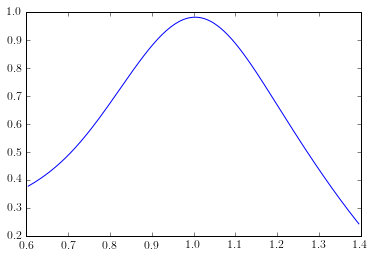

## Test fitting a Gaussian to the peak  P_LS

In [434]:
frequency, P_obs

(array([ 0.00079577,  0.00159155,  0.00238732,  0.0031831 ,  0.00397887,
         0.00477465,  0.00557042,  0.0063662 ,  0.00716197,  0.00795775,
         0.00875352,  0.0095493 ,  0.01034507,  0.01114085,  0.01193662,
         0.0127324 ,  0.01352817,  0.01432394,  0.01511972,  0.01591549,
         0.01671127,  0.01750704,  0.01830282,  0.01909859,  0.01989437,
         0.02069014,  0.02148592,  0.02228169,  0.02307747,  0.02387324,
         0.02466902,  0.02546479,  0.02626057,  0.02705634,  0.02785212,
         0.02864789,  0.02944366,  0.03023944,  0.03103521,  0.03183099,
         0.03262676,  0.03342254,  0.03421831,  0.03501409,  0.03580986,
         0.03660564,  0.03740141,  0.03819719,  0.03899296,  0.03978874,
         0.04058451,  0.04138029,  0.04217606,  0.04297183,  0.04376761,
         0.04456338,  0.04535916,  0.04615493,  0.04695071,  0.04774648,
         0.04854226,  0.04933803,  0.05013381,  0.05092958,  0.05172536,
         0.05252113,  0.05331691,  0.05411268,  0.0

amplitude, position, sigma
[ 0.88772098  0.15247431  0.04794366]


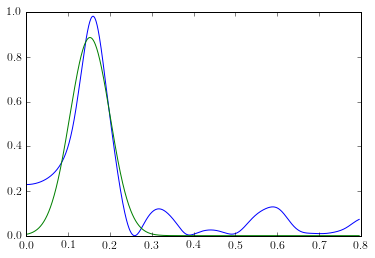

In [444]:
from scipy.optimize import leastsq
from scipy import *

def gaussian(x, A, x0, sig):
    return A*exp(-(x-x0)**2/(2.0*sig**2))

def fit(p,x):
    return np.sum([gaussian(x, p[i*3],p[i*3+1],p[i*3+2]) 
                   for i in range(len(p)//3)],axis=0)

err = lambda p, x, y: fit(p,x)-y

#params are our intitial guesses for fitting gaussians, 
#(Amplitude, x value, sigma):
params = [1,0.15,0.1] # this last one is our noise estimate
#params = np.asarray(params).flatten()

x  = frequency
results, value = leastsq(err, params, args=(x,P_obs))

for res in results.reshape(-1,3):
    print("amplitude, position, sigma")
    print(res)
    
y = fit(results, x)
plt.plot(x, P_obs)
plt.plot(x,y)

sigma_omega = results[2]

## Sinusoid  read from file, cf. eq. 10.49 - 10.50, generate freq. grid with E.Bellm's function, 

The input frequency is f_true = 1
Using 242.50000000000003 bins
Best period: 0.2946293723183734 days


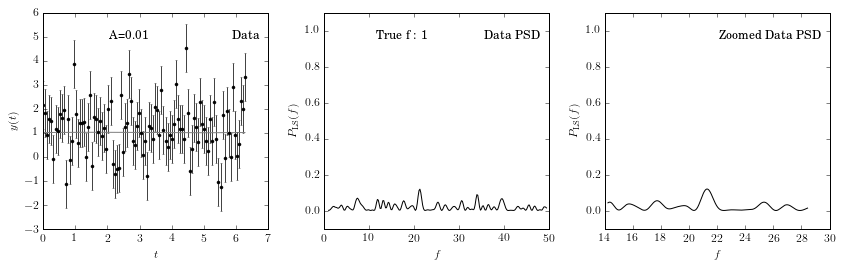

Using 242.50000000000003 bins
Best period: 0.1951727342953251 days


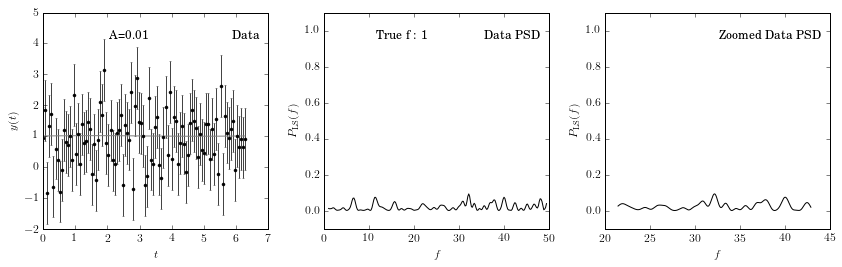

Using 242.50000000000003 bins
Best period: 0.1951727342953251 days


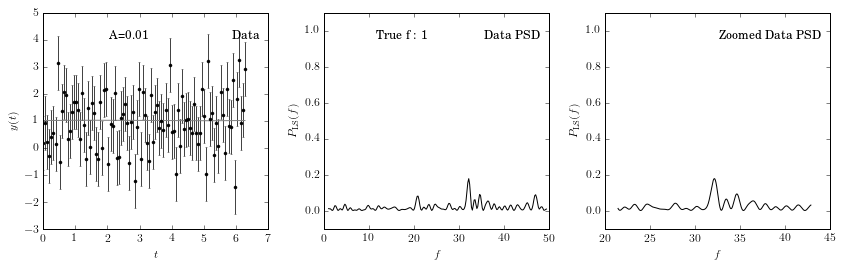

Using 242.50000000000003 bins
Best period: 0.2095844510768554 days


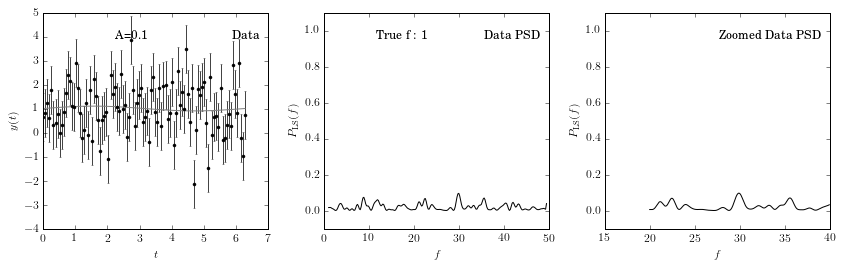

Using 242.50000000000003 bins
Best period: 0.31868834242455646 days


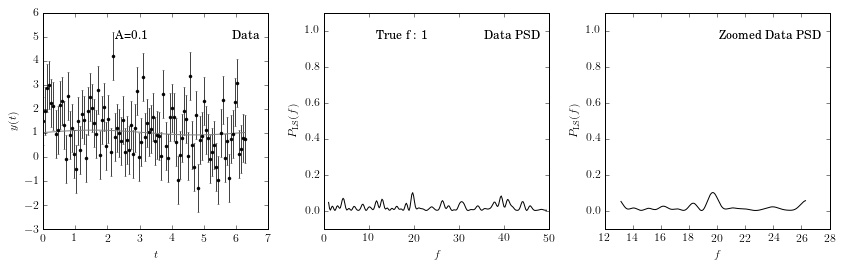

Using 242.50000000000003 bins
Best period: 0.13878174860510312 days


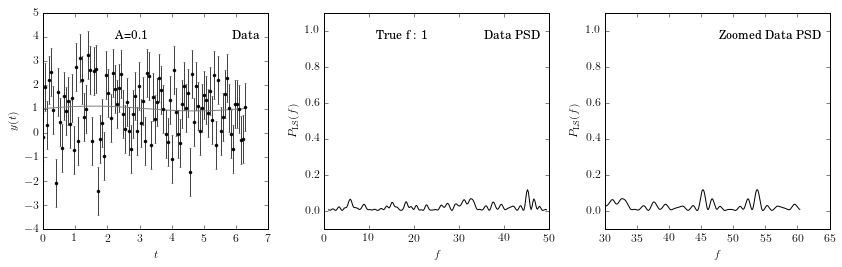

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


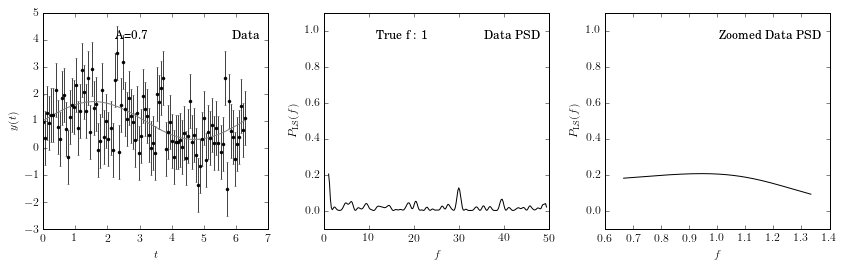

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


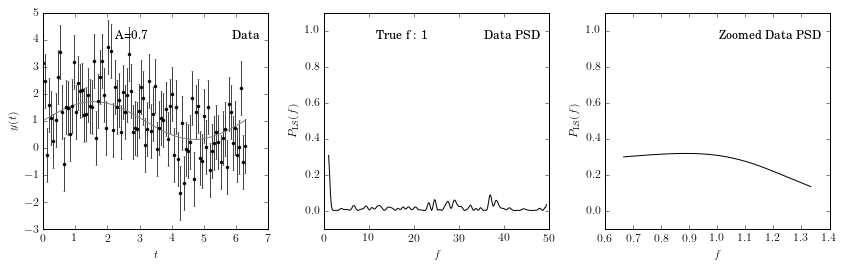

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


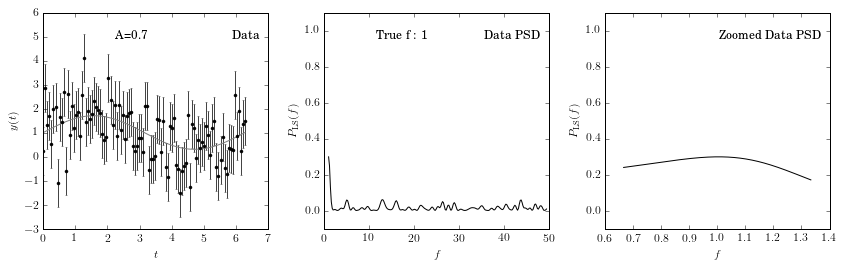

Using 242.50000000000003 bins
Best period: 5.230561861935338 days


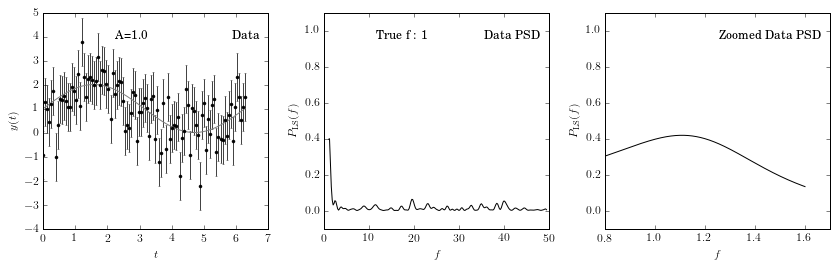

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


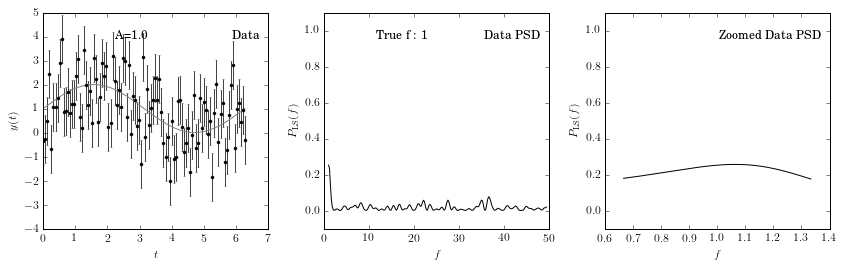

Using 242.50000000000003 bins
Best period: 6.283185307179586 days


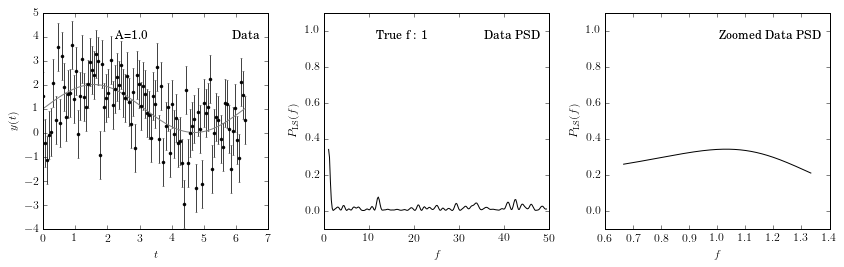

In [335]:
# Calculate 10.14 
from astroML.time_series import lomb_scargle
    
N_periods = 1
f_true = 1 
print('The input frequency is f_true = %d'%f_true)
omega_true = f_true * 2 * np.pi 
t_obs = np.linspace(0, N_periods*omega_true, 100)
#sigma_0 = 1.0
i = 0
for A in [0.01, 0.1, 0.7,1.0] : 
    for k in range(N_iterations):
        fname = '../data_products/time_series_sig_1.0_A_'+str(A).ljust(4,'0')+\
                        '_iteration_'+str(k).rjust(3,'0')+'.txt'
        data = np.genfromtxt(fname)
        xi = data[:,0]
        ei = data[:,1]
        #ei = np.random.normal(loc=0.0, scale=sigma_0, size=len(t_obs)) 
        #y_obs1 = A* np.sin(t_obs) + 1 + ei
        y_obs1 = xi 
        # true underlying time series 
        t = np.linspace(0,  N_periods*omega_true, 10000)
        y = A* np.sin(t) + 1

        #------------------------------------------------------------
        # Compute the periodogram
        def frequency_grid(times):

            freq_min =  2* np.pi / abs(min(times) - max(times))
            delta_t  = np.zeros(len(times)-1) 
            for i in range(len(times)-1):
                delta_t[i] = (times[i+1]-times[i])
            freq_max = freq_max = np.pi /  np.median(delta_t)  # COMPLETE

            omega_min = 2*np.pi * freq_min

            n_bins =   5 * 2*np.pi*(freq_max - freq_min) /omega_min  # COMPLETE
            print('Using {} bins'.format(n_bins))
            return np.linspace(freq_min, freq_max, n_bins)

        omega = frequency_grid(t_obs)

        P_obs1 = lomb_scargle(t_obs, y_obs1, sigma_0*np.ones_like(y_obs1), omega)
        #P_true = lomb_scargle(t, y,  omega)

        def LS_peak_to_period(omegas, P_LS):
            """find the highest peak in the LS periodogram and return the corresponding period."""
            max_freq = omegas[np.argmax(P_LS)]
            return 2*np.pi/max_freq

        # provided alternate frequency function
        def alt_frequency_grid(Pmin, Pmax, n_bins = 5000):
            """Generate an angular frequency grid between Pmin and Pmax (assumed to be in days)"""
            freq_max = 2*np.pi / Pmin
            freq_min = 2*np.pi / Pmax
            return np.linspace(freq_min, freq_max, n_bins)

        best_period = LS_peak_to_period(omega, P_obs1)
        print("Best period: {} days".format(best_period))

        # Zoom in on the peak... , find new omegas and powers 
        zoomed_omega = alt_frequency_grid(Pmin=0.75*best_period, Pmax=1.5*best_period, n_bins = 5000) #
        P_obs2 = lomb_scargle(t_obs, y_obs1, sigma_0*np.ones_like(y_obs1), zoomed_omega)

        #------------------------------------------------------------
        # Prepare the figures
        from astroML.plotting import setup_text_plots
        setup_text_plots(fontsize=12, usetex=True)

        fig, ax = plt.subplots(1,3,figsize=(13, 4))
        fig.subplots_adjust(bottom=0.15, hspace=0.35, wspace=0.25,
                            left=0.11, right=0.95)

        ax[0].plot(t, y, '-', c='gray')
        ax[0].errorbar(t_obs, y_obs1, sigma_0, fmt='.k', capsize=1, ecolor='#444444')
        ax[0].text(0.96, 0.92, "Data", ha='right', va='top', transform=ax[0].transAxes)
        ax[0].text(0.46, 0.92, "A="+str(A), ha='right', va='top', transform=ax[0].transAxes)
        #ax[0].set_ylim(-1.5, 1.8)
        ax[0].set_xlabel('$t$')
        ax[0].set_ylabel('$y(t)$')

        #
        #ax[1].fill(omega, P_true, fc='gray', ec='gray')
        ax[1].plot(omega, P_obs1, '-', c='black')

        ax[1].text(0.96, 0.92, "Data PSD", ha='right', va='top', transform=ax[1].transAxes)
        ax[1].text(0.46, 0.92, "True f : "+str(f_true), ha='right', va='top', transform=ax[1].transAxes)
        ax[1].set_ylim(-0.1, 1.1)
        ax[1].set_xlabel('$f$')
        ax[1].set_ylabel(r'$P_{\rm LS}(f)$')

        ax[2].plot(zoomed_omega, P_obs2, '-', c='black')
        ax[2].text(0.96, 0.92, "Zoomed Data PSD", ha='right', va='top', transform=ax[2].transAxes)
        ax[2].set_ylim(-0.1, 1.1)
        ax[2].set_xlabel('$f$')
        ax[2].set_ylabel(r'$P_{\rm LS}(f)$')

        plt.savefig('../data_products/aaa_Sine_'+str(i).rjust(2,'0')+'_PSD_sig_1.0_xi_ei_A_'+str(A)+'_iter_'+str(k).rjust(3,'0')+'N_periods_'+str(N_periods)+'.png')
        plt.show()
        i +=1

